In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sports-car-prices-dataset/Sport car price.csv


In [2]:
# Reading the data
data = pd.read_csv('/kaggle/input/sports-car-prices-dataset/Sport car price.csv')
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [3]:
# lets check shape of the data
data.shape

(1007, 8)

In [4]:
# lets checck data type of each column of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


We need to convert data type of few columns to appropraite

In [5]:
# change data type of columns
data['Car Make'] = data['Car Make'].astype(str)
data['Car Model'] = data['Car Model'].astype(str)
data['Year'] = data['Year'].astype(str)
data['Engine Size (L)'] = data['Engine Size (L)'].astype(str)
data['Horsepower'] = data['Horsepower'].astype(str)
data['Torque (lb-ft)'] = data['Torque (lb-ft)'].astype(str)
data['0-60 MPH Time (seconds)'] = data['0-60 MPH Time (seconds)'].astype(str)

In [6]:
# removing , from price column 
data['Price (in USD)'] = data['Price (in USD)'].str.replace(',','')
data['Price (in USD)'] = data['Price (in USD)'].astype(int) # converting to int

In [7]:
# lets view data again
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


## **Is there any Missing value value in the dataset**

In [8]:
# check for missing values
data.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

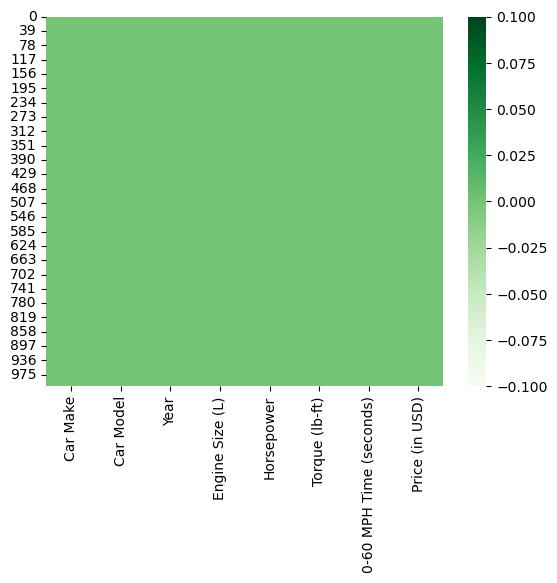

In [9]:
# check for missing values using plot
sns.heatmap(data.isna(), cmap='Greens')
plt.show()

## **List Total Number of vehicles sold on Each Year**

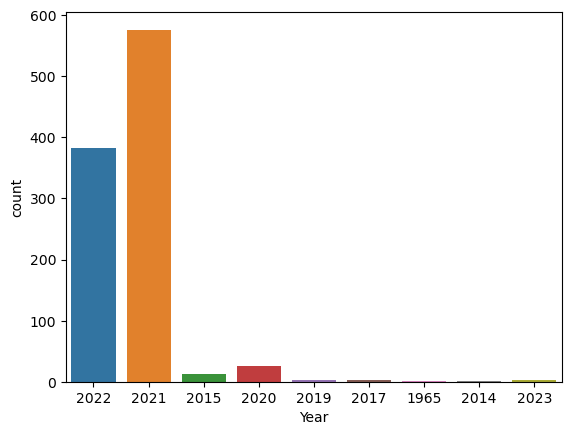

In [10]:
# plot number of vehicles sold on each year
sns.countplot(data=data, x='Year')
plt.show()

 We can see that more vehicles sold in the year 2021

## **List the Number of Vehicles sold by each Car Make**

In [11]:
car_make = pd.DataFrame(data['Car Make'].value_counts())
car_make.head()

,Car Make
Porsche,88
McLaren,75
Audi,71
Lamborghini,66
BMW,63


In [12]:
# plot most sold cars
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=car_make.index, y=car_make['Car Make'], text=car_make['Car Make'], textposition='auto')])
fig.update_layout(title='Number of Vehicles sold by each Car Make', xaxis_title='Car Make Name', yaxis_title='Number of Cars')
fig.update_traces(marker_color='rgb(0, 204, 0)', marker_line_color='rgb(204, 255, 204)',
                  marker_line_width=1.5)
fig.show()


We can also plot top 20 car make who sold more number of vehicls

In [13]:
# plotting top 20 
car_make1 = car_make.head(20)
# plot most sold cars
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=car_make1.index, y=car_make1['Car Make'], text=car_make1['Car Make'], textposition='auto')])
fig.update_layout(title='Number of Vehicles sold by each Car Make', xaxis_title='Car Make Name', yaxis_title='Number of Cars')
fig.update_traces(marker_color='rgb(0, 204, 0)', marker_line_color='rgb(204, 255, 204)',
                  marker_line_width=1.5)
fig.show()

## **List Top Five Bands who sold More Number of Car in 2021**

In [14]:
data_2021 = data[data['Year'] == '2021']
data_2021.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
4,McLaren,720S,2021,4,710,568,2.7,298000
6,Mercedes-Benz,AMG GT,2021,4,523,494,3.8,118500
7,Chevrolet,Corvette,2021,6.2,490,465,2.8,59900
9,Nissan,GT-R Nismo,2021,3.8,600,481,2.5,212000


In [15]:
car_make_2021 = pd.DataFrame(data_2021['Car Make'].value_counts())
car_make_2021.sort_values(by='Car Make', ascending=False, inplace=True)
car_make_2021 = car_make_2021.head(20)
car_make_2021.head()

,Car Make
Lamborghini,60
McLaren,53
Chevrolet,46
Porsche,37
Ferrari,37


In [16]:
# plot most sold cars in 2021
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=car_make_2021.index, y=car_make_2021['Car Make'], text=car_make_2021['Car Make'], textposition='auto')])
fig.update_layout(title='Most cars sold by each Car Make in 2021', xaxis_title='Car Make Name', yaxis_title='Number of Cars')
fig.show()

## **List Top 10 Most Expensive Car Brand in the Year 2021**

In [17]:
# getting the data
most_expensive = data_2021[['Car Make', 'Price (in USD)']].copy()
most_expensive.sort_values(by='Price (in USD)', ascending=False, inplace=True)
most_expensive = most_expensive.head(10)
most_expensive.head()

,Car Make,Price (in USD)
823,Bugatti,5200000
438,Lamborghini,3600000
624,Bugatti,3599000
385,Pagani,3500000
279,Pagani,3500000


In [18]:
# plotting most expensive cars in the year 2021
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=most_expensive['Car Make'], y=most_expensive['Price (in USD)'], text=most_expensive['Price (in USD)'], textposition='auto')])
fig.update_layout(title='Most Expensive Cars in 2021', xaxis_title='Car Make Name', yaxis_title='Price in USD')
fig.show()

It will be better if we visualize in table

In [19]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Car Make Name', 'Price in USD'], line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
                 cells=dict(values=[most_expensive['Car Make'], most_expensive['Price (in USD)']], fill_color='lavender',
               align='center'))
                     ])
fig.show()

## **List Most Expensive Car Model in the Year 2021**

In [20]:
# Getting the data
most_ex_car_model = data_2021[['Car Model', 'Price (in USD)']].copy()
most_ex_car_model.sort_values(by='Price (in USD)', ascending=False, inplace=True)
most_ex_car_model = most_ex_car_model.head(5)
most_ex_car_model.head()

,Car Model,Price (in USD)
823,Chiron Super Sport 300+,5200000
438,Sián,3600000
624,Chiron Pur Sport,3599000
385,Huayra,3500000
279,Huayra Roadster BC,3500000


In [21]:
# plotting most expensive cars in the year 2021
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=most_ex_car_model['Car Model'], y=most_ex_car_model['Price (in USD)'], text=most_ex_car_model['Price (in USD)'], textposition='auto')])
fig.update_layout(title='Most Expensive Top 5 Cars Modle in 2021', xaxis_title='Car Model Name', yaxis_title='Price in USD')
fig.show()

In [22]:
data.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')